# Progressive Multi-Jittered Sample Sequences
Rust implementation of Christensen et al. 2018
https://graphics.pixar.com/library/ProgressiveMultiJitteredSampling/paper.pdf
Based on the supplemental pseudocode:
https://graphics.pixar.com/library/ProgressiveMultiJitteredSampling/pmj_suppl.pdf

## Generating 2D sample sequences

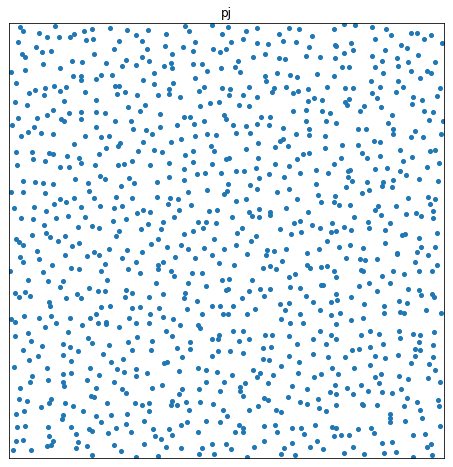

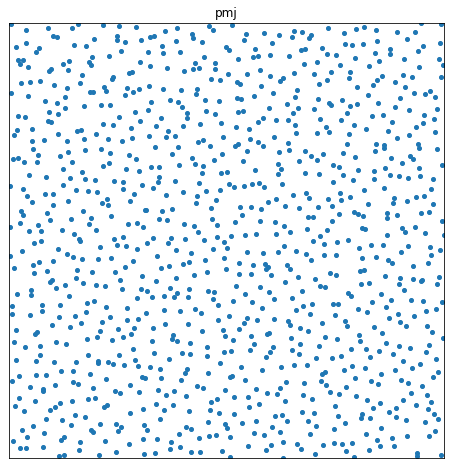

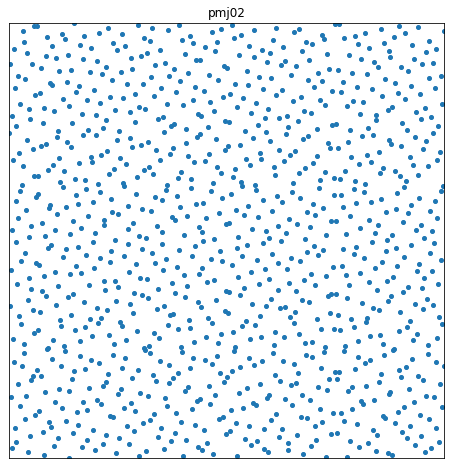

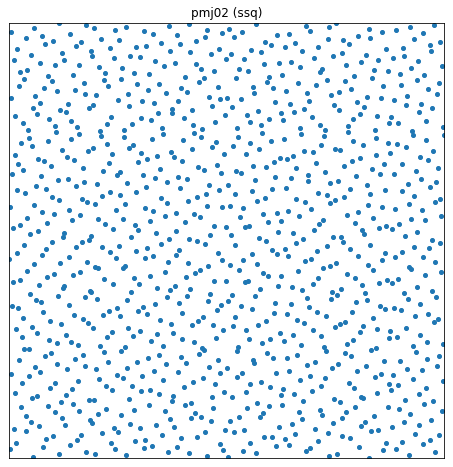

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import subprocess as sp
from io import StringIO
from math import sqrt

def gen_pmj(pattern='pmj02', numsamples=1024, seed=0):
    output = sp.check_output(['cargo', 'run', '--release', '--example', 
                              'gen_%s' % pattern, 
                              '--', 
                              '--numsamples', str(numsamples), 
                              '--seed', str(seed)])
    s = StringIO(output.decode('utf-8'))
    return np.loadtxt(s)

def next_power_of_2(x):  
    return 1 if x == 0 else 2**(x - 1).bit_length()

def plot_pmj(pattern='pmj02', numsamples=1024, seed=0, selectquadrants=False, title=None, showstrata=False):
    args = ['cargo', 'run', '--release', '--example', 
                              'gen_%s' % pattern, 
                              '--', 
                              '--numsamples', str(numsamples), 
                              '--seed', str(seed)]
    if selectquadrants:
        args.append('-q')
    output = sp.check_output(args)
    
    sqrt_num_samples = next_power_of_2(int(sqrt(numsamples)))
    ptrn_num_samples = sqrt_num_samples ** 2
    
    s = StringIO(output.decode('utf-8'))
    pmj02 = np.loadtxt(s)
    fig = plt.figure(figsize=(8, 8))
    plt.scatter(pmj02[:,0], pmj02[:,1], s=16)
    plt.axes().set_aspect('equal')
    plt.axis([0, 1, 0, 1])
    ax = fig.gca()
    ax.tick_params(labelbottom=False, labelleft=False, length=0)
    if showstrata:
        ax.set_xticks(np.arange(0, 1, 1./ptrn_num_samples))
        ax.set_yticks(np.arange(0, 1, 1./ptrn_num_samples))
        plt.grid()
    if title:
        plt.title(title)

plot_pmj('pj', numsamples=1024, title='pj')

plot_pmj('pmj', numsamples=1024, title='pmj')

plot_pmj('pmj02', numsamples=1024, title='pmj02')
plot_pmj('pmj02', numsamples=1024, selectquadrants=True, title='pmj02 (ssq)')




plt.show()

## Checking 2D strata

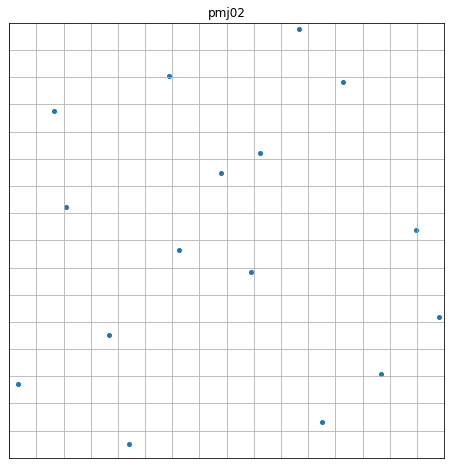

In [118]:
plot_pmj('pmj02', numsamples=16, title='pmj02', showstrata=True)

## Checking 2D projections of a 4D sample set (two sets of 2D samples)

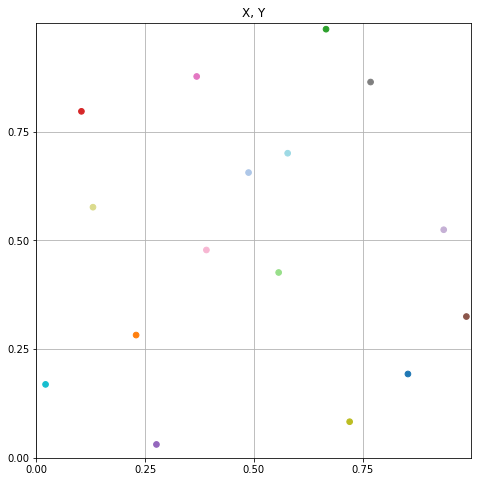

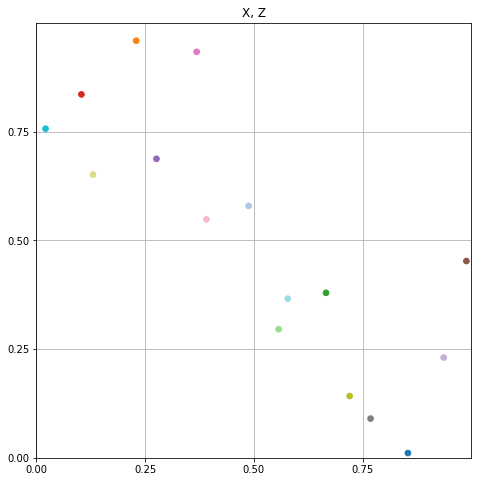

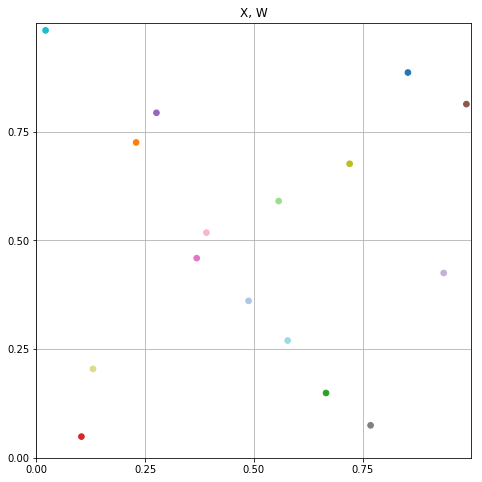

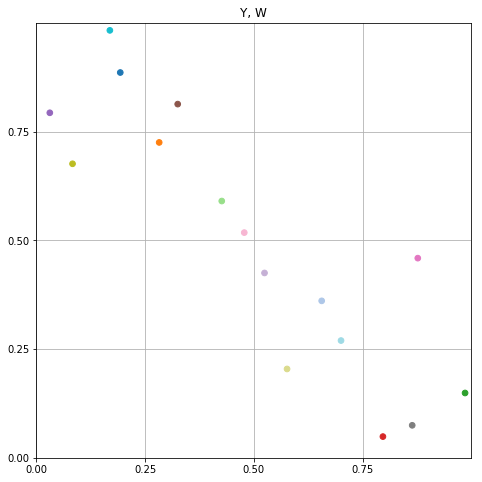

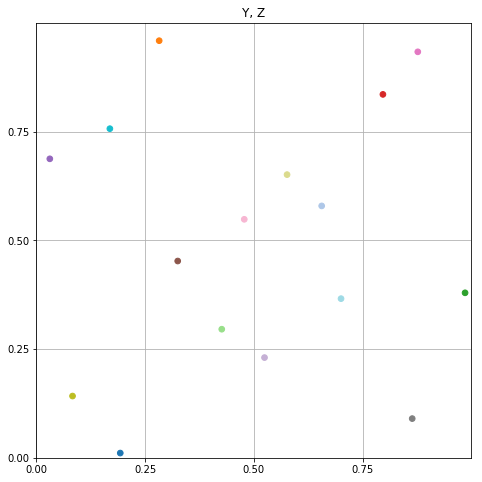

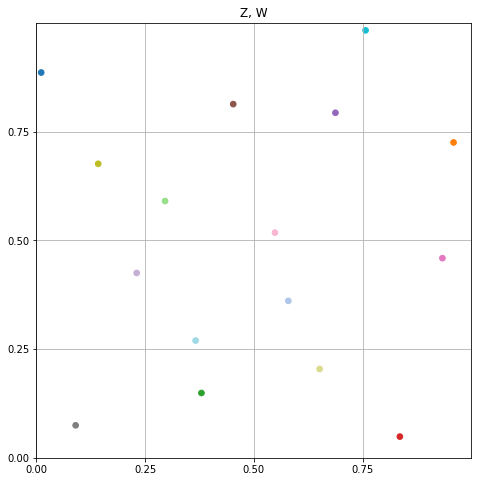

In [115]:
pmj02_a = np.loadtxt('./pmj02_a.dat')
pmj02_b = np.loadtxt('./pmj02_b.dat')

fig = plt.figure(figsize=(8, 8))
plt.scatter(pmj02_a[:16, 0], pmj02_a[:16,1], s=32, c = np.arange(16), cmap='tab20')
plt.axes().set_aspect('equal')
plt.axis([0, 1, 0, 1])
ax = fig.gca()
ax.set_xticks(np.arange(0, 1, 1./4))
ax.set_yticks(np.arange(0, 1, 1./4))
plt.grid()
plt.title('X, Y')

fig = plt.figure(figsize=(8, 8))
plt.scatter(pmj02_a[:16, 0], pmj02_b[:16,0], s=32, c = np.arange(16), cmap='tab20')
plt.axes().set_aspect('equal')
plt.axis([0, 1, 0, 1])
ax = fig.gca()
ax.set_xticks(np.arange(0, 1, 1./4))
ax.set_yticks(np.arange(0, 1, 1./4))
plt.grid()
plt.title('X, Z')

fig = plt.figure(figsize=(8, 8))
plt.scatter(pmj02_a[:16,0], pmj02_b[:16,1], s=32, c = np.arange(16), cmap='tab20')
plt.axes().set_aspect('equal')
plt.axis([0, 1, 0, 1])
ax = fig.gca()
ax.set_xticks(np.arange(0, 1, 1./4))
ax.set_yticks(np.arange(0, 1, 1./4))
plt.grid()
plt.title('X, W')

fig = plt.figure(figsize=(8, 8))
plt.scatter(pmj02_a[:16,1], pmj02_b[:16,1], s=32, c = np.arange(16), cmap='tab20')
plt.axes().set_aspect('equal')
plt.axis([0, 1, 0, 1])
ax = fig.gca()
ax.set_xticks(np.arange(0, 1, 1./4))
ax.set_yticks(np.arange(0, 1, 1./4))
plt.grid()
plt.title('Y, W')

fig = plt.figure(figsize=(8, 8))
plt.scatter(pmj02_a[:16,1], pmj02_b[:16,0], s=32, c = np.arange(16), cmap='tab20')
plt.axes().set_aspect('equal')
plt.axis([0, 1, 0, 1])
ax = fig.gca()
ax.set_xticks(np.arange(0, 1, 1./4))
ax.set_yticks(np.arange(0, 1, 1./4))
plt.grid()
plt.title('Y, Z')

fig = plt.figure(figsize=(8, 8))
plt.scatter(pmj02_b[:16, 0], pmj02_b[:16,1], s=32, c = np.arange(16), cmap='tab20')
plt.axes().set_aspect('equal')
plt.axis([0, 1, 0, 1])
ax = fig.gca()
ax.set_xticks(np.arange(0, 1, 1./4))
ax.set_yticks(np.arange(0, 1, 1./4))
plt.grid()
plt.title('Z, W')


plt.show()